<a href="https://colab.research.google.com/github/funkypro/Titanic-EDA-Project/blob/main/EDA_Titanic_Passenger_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

If we were an insurance company in 1912, how would we determine the risk profile of a passenger? We need to find the correlation between a passenger's attributes (Class, Age, Sex) and their survival outcome.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


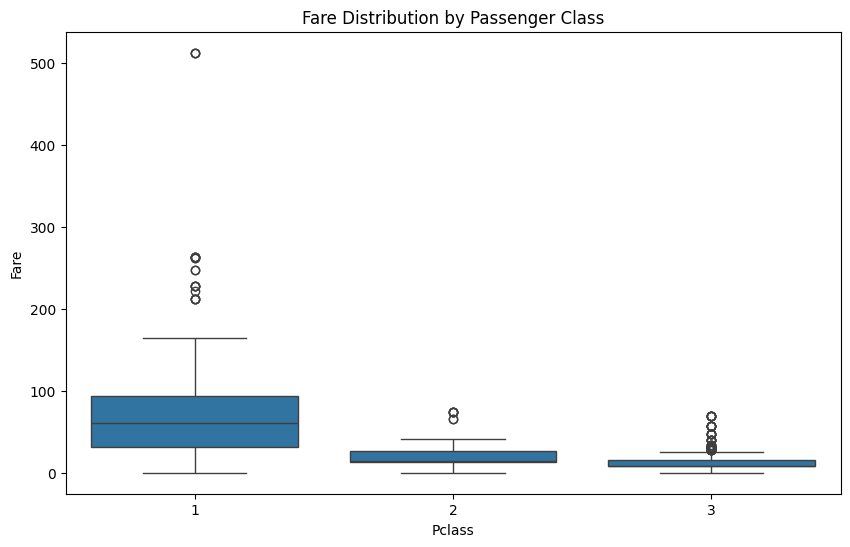

In [4]:
# Create the box plot
plt.figure(figsize=(10, 6)) # This makes the chart readable
sns.boxplot(data=df, x='Pclass', y='Fare')

# title
plt.title('Fare Distribution by Passenger Class')
plt.show()

In [5]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
# The "Smart" Imputation Logic
df['Age'] = df['Age'].fillna(df.groupby('Pclass')['Age'].transform('median'))

print(df['Age'].isnull().sum())

0


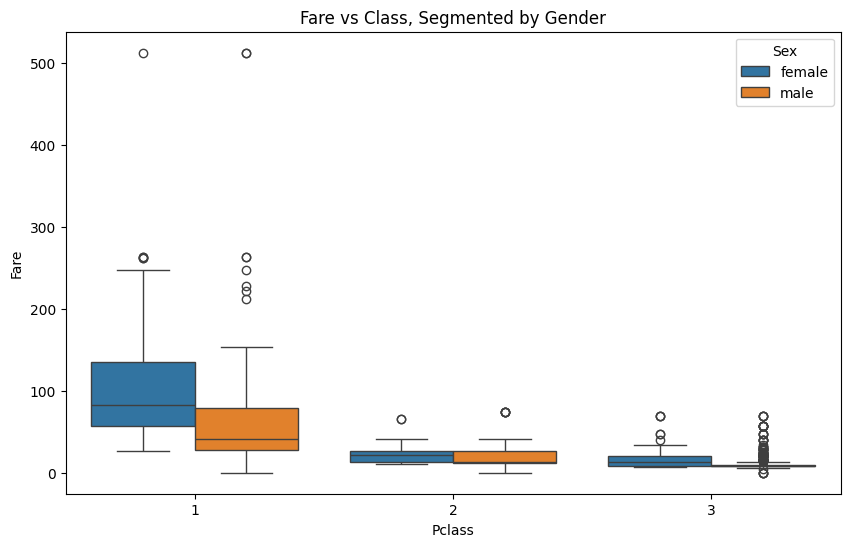

In [7]:
# Create a multi-dimensional Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Pclass', y='Fare', hue='Sex')

plt.title('Fare vs Class, Segmented by Gender')
plt.show()

Survival Probability by Sex and Class:
Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


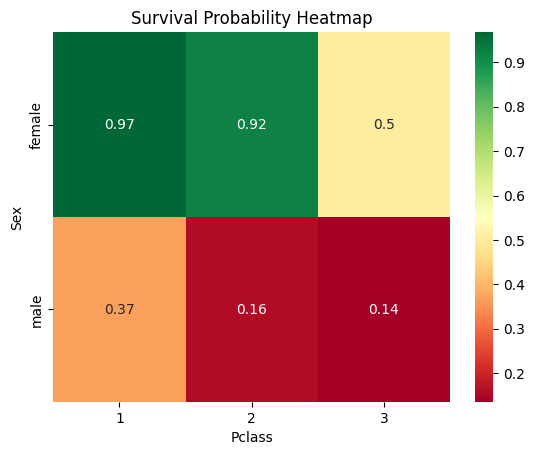

In [8]:
# Pivot table for Survival Rate
survival_matrix = df.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc='mean')

# Display the results
print("Survival Probability by Sex and Class:")
print(survival_matrix)

# Visualize it with a Heatmap
sns.heatmap(survival_matrix, annot=True, cmap='RdYlGn')
plt.title('Survival Probability Heatmap')
plt.show()

In the insurance scenario, a 3rd-class male is a "High Risk" profile, while a 1st-class female is "Low Risk